# Flowers Dataset
http://www.robots.ox.ac.uk/~vgg/data/flowers/17/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os, glob
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def load_flower_data():
    X = []
    y = []
    for f_name in glob.glob("data/jpg/*.jpg"):
        class_index = (int(f_name.split('image_')[1][0:4])-1)/80
        class_index_one_hot = keras.utils.to_categorical(class_index, 17)[0]
        image = Image.open(f_name)
        image = image.resize((32, 32))
        image = np.asarray(image).astype('float32')/255.
        X.append(image)
        y.append(class_index_one_hot)
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = load_flower_data()

In [4]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)

('X_train shape:', (911, 32, 32, 3))
('X_test shape:', (449, 32, 32, 3))
('y_train shape:', (911, 17))


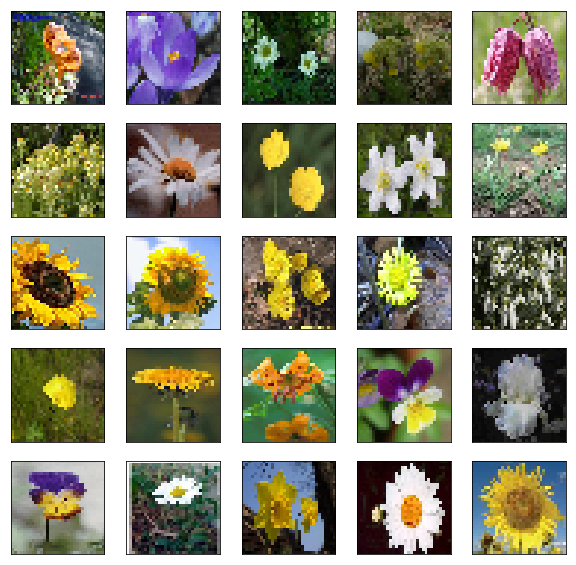

In [5]:
fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i,:].reshape(32, 32, 3), interpolation='nearest')

plt.show()

In [6]:
batch_size = 32
epochs = 100
num_classes = 17

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [ ]:
#train the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Save model weights
save_dir = 'saved_models'
model_name = 'flowers_cnn_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)